### Loading Data

In [1]:
import numpy as np
import pandas as pd
datas = np.load('E_origninal.npy')
numero_senseur = np.load('numeroDesCapteur.npy')

        
    
    

### Imputation by the precedent value 

In [2]:
#naive imputation by the precedent value
def imputation_precedent(data):
    m,n = data.shape
    for i in range(m):
        for j in range(n):
            if data[i,j] == -1:
                data[i,j] = data[i,j-1]
    return None

imputation_precedent(datas)

datas_pandas = pd.DataFrame(datas)
datas_pandas.index = numero_senseur

nb_cap = 1 # datas.shape[0]
voisin = np.load('tousLesVoisinsDeTouslesPionts.npy',allow_pickle = True)
datas_pandas.head()



,0,1,2,3,4,5,6,7,8,9,...,33328,33329,33330,33331,33332,33333,33334,33335,33336,33337
158895,77,83,74,72,79,86,91,74,74,75,...,84,84,84,84,65,65,65,65,65,68
187509,12,12,12,16,16,31,31,31,31,31,...,32,32,32,32,32,32,32,32,32,32
195041,52,56,55,58,53,52,54,54,52,58,...,46,46,46,46,46,46,46,46,46,46
195552,0,0,0,0,0,0,0,0,0,13,...,38,38,38,27,27,19,19,19,19,19
209827,46,47,47,47,50,48,43,46,50,49,...,63,63,63,58,58,56,56,56,56,85


In [3]:
print(voisin[:3])

[list([158895, 158924, 158744, 172602, 173118, 158715])
 list([187509, 187324, 187377, 203742, 203716, 184595, 187430, 187456, 198113, 187350, 187403, 187483, 184621, 184649, 184675, 180709, 180735])
 list([195041, 193376, 206396, 206422, 195843, 195015, 195790, 195817, 193430, 206343, 206369])]


### Creating a table of the sensor to modelizse with his neighbor's data 

In [4]:
#creating a table of the sensor to modelizse with his neighbor's data 
#for i in range(nb_cap):
cap = voisin[0]
model_cap = pd.DataFrame(columns = np.arange(datas.shape[1]))
for ind in range(len(cap)):
    model_cap.loc[ind] = datas_pandas.loc[cap[ind]]

#numerate neighbor sensor and efface their sensor number
model_cap = model_cap.astype(int)

model_cap




,0,1,2,3,4,5,6,7,8,9,...,33328,33329,33330,33331,33332,33333,33334,33335,33336,33337
0,77,83,74,72,79,86,91,74,74,75,...,84,84,84,84,65,65,65,65,65,68
1,65,65,70,70,68,66,68,70,70,70,...,41,41,69,69,69,69,69,69,69,81
2,84,79,79,84,95,87,82,86,91,82,...,57,57,57,57,89,86,86,86,86,91
3,35,34,33,34,33,34,37,36,36,33,...,33,33,33,33,38,35,35,35,35,35
4,26,27,29,29,23,33,31,27,29,29,...,33,33,33,33,33,33,33,33,33,33
5,90,91,90,96,90,90,91,88,91,94,...,82,82,128,82,81,67,67,67,67,75


### Adding random gaussian noise manually to the p% of the data in the model sensor as a trial

In [5]:
#adding gaussian noise manually
#sampling of p% of model_capets and creation of label
np.random.seed(42)

model_p = []
p_range = np.linspace(0.05,0.3,6)
for p in p_range:
    
    model_sensor = model_cap.iloc[0,:].copy()
    sample = np.random.choice(range(model_sensor.shape[0]),int(p*model_sensor.shape[0]),replace= False)
    sample = np.unique(sample)
    label = np.zeros(model_sensor.shape)
#adding gaussien noise to p% of the model_capet, mu mean, sigma ecart-type


    mu = 0.5* np.mean(model_sensor)
    sigma = 0.3*np.mean(model_sensor)

    for i in range(len(sample)):
        label[sample[i]] = 1
        model_sensor[sample[i]] += np.random.normal(mu,sigma)
    
    model = model_cap.copy()
    model.iloc[0,:] = model_sensor
    
    model_diff = pd.DataFrame(columns = np.arange(datas.shape[1]))
    for ind in range(1,len(cap)):
        #model_diff.loc['cap{}-cap0'.format(str(ind))] = np.abs(datas_pandas.loc[cap[ind]] - datas_pandas.iloc[0])
        model_diff.loc['cap{}-cap0'.format(str(ind))] = (model.loc[ind] - model.iloc[0])
        #model_diff.loc['cap{}-cap0 square'.format(str(ind))] = (datas_pandas.loc[cap[ind]]
                                                                    #- datas_pandas.iloc[0])**2


    model_diff = model_diff.astype(int)
    model_diff = model_diff.transpose()
    model_diff
    model_p.append((str(p),model_diff,label))
    print(label[label==1].size/label.size)
    
 # verifacation whether we have p% model_cap
#replace sensor data in the original data
#model_cap
model_p

0.04997300377947087
0.09997600335952966
0.14997900293958846
0.19998200251964726
0.24998500209970603
0.29998800167976486


[('0.05',        cap1-cap0  cap2-cap0  cap3-cap0  cap4-cap0  cap5-cap0
  0            -12          7        -42        -51         13
  1            -18         -4        -49        -56          8
  2             -4          5        -41        -45         16
  3             -2         12        -38        -43         24
  4            -11         16        -46        -56         11
  ...          ...        ...        ...        ...        ...
  33333          4         21        -30        -32          2
  33334          4         21        -30        -32          2
  33335          4         21        -30        -32          2
  33336          4         21        -30        -32          2
  33337         13         23        -33        -35          7
  
  [33338 rows x 5 columns], array([0., 0., 0., ..., 0., 0., 0.])),
 ('0.1',        cap1-cap0  cap2-cap0  cap3-cap0  cap4-cap0  cap5-cap0
  0            -12          7        -42        -51         13
  1            -18         -4    

### Creating new feature in the model

### Visualisation of histogram,covariance matrix and correlation heat map

### Creating training set and test set

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

accuracy_p = []
AUC_p = []

for name,model,label in model_p:
    trainset_perc = 0.7
    #limiting data to have a smaller dataset to test

    #time_limit = datas.shape[1]
    time_limit = 15000

    X = model.values[:time_limit,:]
    y = label[:time_limit]
    train_size = int(trainset_perc*time_limit)

    #X_outliers = model_sensor.values[:time_limit]
    #X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = testset_perc)
    X_train,y_train = X[:train_size,:],y[:train_size]
    X_test,y_test = X[train_size:,:],y[train_size:]

    svclassifier = SVC(kernel='linear',gamma='auto')
    svclassifier.fit(X_train, y_train)
    y_pred_lin = svclassifier.predict(X_test)


    score_lin = svclassifier.score(X_test,y_test)
    print("The accuracy of p = {} linear model is : %f".format(name)%score_lin)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_lin)
    roc_auc = auc(fpr, tpr)
    accuracy_p.append(score_lin)
    AUC_p.append(roc_auc)
    

The accuracy of p = 0.05 linear model is : 0.965333
The accuracy of p = 0.1 linear model is : 0.941333
The accuracy of p = 0.15000000000000002 linear model is : 0.932000
The accuracy of p = 0.2 linear model is : 0.921778
The accuracy of p = 0.25 linear model is : 0.900444
The accuracy of p = 0.3 linear model is : 0.905111


### One class classification SVM

### SVM kernel rbf

### SVM linear

### Plot of ROC curve

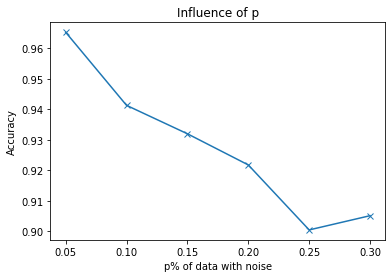

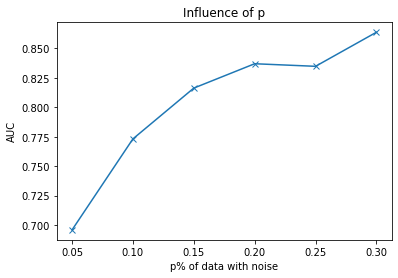

In [13]:
import matplotlib.pyplot as plt

# Plot ROC curve
plt.figure()

plt.plot(p_range,accuracy_p,'x-')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('p% of data with noise')
plt.ylabel('Accuracy')
plt.title('Influence of p')

plt.figure()

plt.plot(p_range,AUC_p,'x-')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
plt.xlabel('p% of data with noise')
plt.ylabel('AUC')
plt.title('Influence of p')

plt.show()
